# Data Processing and Visualization

### In the previous chapter, we touched upon a general approach of time series analysis which consists of two main steps:
- Data visualization to check the presence of trend, seasonality, and cyclical patterns
- Adjustment of trend and seasonality to generate stationary series

### Generating stationary data is important for enhancing the time series forecasting model. Deduction of the trend, seasonal, and cyclical components would leave us with irregular fluctuations which cannot be modeled by using only the time index as an explanatory variable. 

### Therefore, in order to further improve forecasting, the irregular fluctuations are assumed to be independent and identically distributed (iid) observations and modeled by a linear regression on variables other than the time index.

#### For example, house prices might exhibit both trend and seasonal (for example, quarterly) variations. However, the residuals left after adjusting trend and seasonality might actually depend on exogenous variables, such as total floor space, number of floors in the building and so on, which depend on specific instances in the sampled data. 

#### Therefore trend and seasonality adjustments along with a model on exogenous variables would be a better forecast for future instances of the time series.

### Changing the original time series to iid observations, or in other words stationarizing a time series, is an important step for developing the linear regression model on exogenous variables. This is because there exist well-established statistical methods, for example central limit theorem, least squares method, and so on, which work well for iid observations.

### The methodology for time series analysis described in the preceding paragraphs is summarized in the following flowchart. In this chapter, we will cover steps 1, 2, and 3 of this methodology in the following topics:
- Advanced processing and visualization of time series data
- Statistical hypothesis testing to verify stationarity of a time series
- Time series decomposition for adjusting trends and seasonality

#### The reader would find the mathematical concepts discussed in this chapter to be fundamental building blocks for developing time series forecasting models.

![generic_methodology_of_time_series_analysis](images/generic_methodology_of_time_series_analysis.png)

## Advanced processing and visualization of time series data

#### In many cases, the original time series needs to be transformed into aggregate statistics. 

#### For example, observations in the original time series might have been recorded at every second; however, in order to perform any meaningful analysis, data must be aggregated every minute. 

#### This would need resampling the observations over periods that are longer than the granular time indices in the original data. The aggregate statistics, such as mean, median, and variance, is calculated for each of the longer periods of time.

#### Another example of data pre-processing for time series, is computing aggregates over similar segments in the data. Consider the monthly sales of cars manufactured by company X where the data exhibits monthly seasonality, due to which sales during a month of a given year shows patterns similar to the sales of the same month in the previous and next years. To highlight this kind of seasonality we must remove the long-run trend from the data. 

#### However, let us assume there is no long-run trend or it has already been adjusted. We are interested in estimating the season wise (in this case month wise) statistics to determine between-seasons (between-months) variations.

#### For example, we require average sales during January, February, and so on to understand how the sales vary on an average over any given year. Season wise trends, such as month wise sales of cars, can be obtained by first grouping the original time series into 12 segments, each segment being defined by a month, and then aggregating the data for every segment.

### Note that both resampling and group-by operations divide the original time series in non-overlapping chunks to find the aggregates. Both the techniques are going to reduce noise and subsequently produce smoothing of the original time series.

### However, sometimes continuous or running aggregates of the time series are required for analysis. The technique of computing aggregates over windows of successive time periods gives moving or rolling aggregates. 

#### For example, quarterly moving averages of the car sales data would be finding averages over a four month window that shifts by one month every time. By shifting or rolling the window of computation, the moving averages are generated.

### The techniques are demonstrated with examples in the following three sub sections:
- Resampling time series data
- Performing group-by
- Calculating moving statistics

We will use the pandas data processing API for implementing the techniques.

## Resampling time series data

In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
os.chdir('/home/ishta/Analyzing-and-predicting-the-volatile-market-patterns-for-trading/Notebooks_time_series')

In [3]:
data = pd.read_csv('Datasets/eurusd_minute.csv')

In [4]:
print('Column names:', data.columns)

Column names: Index(['Date', 'Time', 'BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH', 'AL', 'AC',
       'ACh'],
      dtype='object')


In [62]:
# Assuming 'Date' and 'Time' columns are in datetime format
if 'Date' in data.columns and 'Time' in data.columns:
    data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('DateTime', inplace=True)

# Define the time range
start_time = '2005-01-03 01:00:00'
end_time = '2005-05-05 02:50:00'

# Extract rows within the specified time range
selected_rows = data.loc[start_time:end_time].copy()  # Ensure you have a copy

# Drop rows with empty points (NaN values)
selected_rows.dropna(inplace=True)

# Reset the index if needed
selected_rows.reset_index(inplace=True)

#Change the row indices of the dataframe using the Date column
selected_rows.index = selected_rows['DateTime']

In [63]:
print('Column names:', selected_rows.columns)

Column names: Index(['DateTime', 'Date', 'Time', 'BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH',
       'AL', 'AC', 'ACh'],
      dtype='object')


In [64]:
selected_rows

,DateTime,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
DateTime,,,,,,,,,,,,,
2005-01-03 01:00:00,2005-01-03 01:00:00,2005-01-03,1:0,1.35435,1.35455,1.3542,1.3543,0.00005,1.35495,1.35495,1.3545,1.3546,0.00035
2005-01-03 01:01:00,2005-01-03 01:01:00,2005-01-03,1:1,1.35420,1.35430,1.3541,1.3543,-0.00010,1.35450,1.35460,1.3544,1.3546,-0.00010
2005-01-03 01:02:00,2005-01-03 01:02:00,2005-01-03,1:2,1.35420,1.35420,1.3541,1.3541,0.00010,1.35450,1.35450,1.3544,1.3544,0.00010
2005-01-03 01:03:00,2005-01-03 01:03:00,2005-01-03,1:3,1.35420,1.35420,1.3541,1.3541,0.00010,1.35450,1.35450,1.3544,1.3544,0.00010
2005-01-03 01:04:00,2005-01-03 01:04:00,2005-01-03,1:4,1.35420,1.35420,1.3540,1.3541,0.00010,1.35450,1.35450,1.3543,1.3544,0.00010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-05 02:41:00,2005-05-05 02:41:00,2005-05-05,2:41,1.29340,1.29340,1.2934,1.2934,0.00000,1.29360,1.29360,1.2936,1.2936,0.00000
2005-05-05 02:43:00,2005-05-05 02:43:00,2005-05-05,2:43,1.29330,1.29330,1.2933,1.2933,0.00000,1.29350,1.29350,1.2935,1.2935,0.00000
2005-05-05 02:44:00,2005-05-05 02:44:00,2005-05-05,2:44,1.29330,1.29330,1.2933,1.2933,0.00000,1.29350,1.29350,1.2935,1.2935,0.00000


## Let us shown an example of resampling to a given frequency


#### The observations seem to be taken at an interval of 1 minute

In [65]:
#Parse the timestamp to datetime row index of the DataFrame
datetime_rowid = selected_rows['DateTime'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
selected_rows.index = datetime_rowid
selected_rows.head(10)

,DateTime,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
DateTime,,,,,,,,,,,,,
2005-01-03 01:00:00,2005-01-03 01:00:00,2005-01-03,1:0,1.35435,1.35455,1.3542,1.3543,0.00005,1.35495,1.35495,1.3545,1.3546,0.00035
2005-01-03 01:01:00,2005-01-03 01:01:00,2005-01-03,1:1,1.35420,1.35430,1.3541,1.3543,-0.00010,1.35450,1.35460,1.3544,1.3546,-0.00010
2005-01-03 01:02:00,2005-01-03 01:02:00,2005-01-03,1:2,1.35420,1.35420,1.3541,1.3541,0.00010,1.35450,1.35450,1.3544,1.3544,0.00010
2005-01-03 01:03:00,2005-01-03 01:03:00,2005-01-03,1:3,1.35420,1.35420,1.3541,1.3541,0.00010,1.35450,1.35450,1.3544,1.3544,0.00010
2005-01-03 01:04:00,2005-01-03 01:04:00,2005-01-03,1:4,1.35420,1.35420,1.3540,1.3541,0.00010,1.35450,1.35450,1.3543,1.3544,0.00010
2005-01-03 01:05:00,2005-01-03 01:05:00,2005-01-03,1:5,1.35400,1.35420,1.3540,1.3541,-0.00010,1.35430,1.35450,1.3543,1.3544,-0.00010
2005-01-03 01:06:00,2005-01-03 01:06:00,2005-01-03,1:6,1.35410,1.35440,1.3541,1.3544,-0.00030,1.35440,1.35470,1.3544,1.3547,-0.00030
2005-01-03 01:07:00,2005-01-03 01:07:00,2005-01-03,1:7,1.35440,1.35450,1.3544,1.3545,-0.00010,1.35470,1.35480,1.3547,1.3548,-0.00010
2005-01-03 01:08:00,2005-01-03 01:08:00,2005-01-03,1:8,1.35450,1.35450,1.3544,1.3545,0.00000,1.35480,1.35480,1.3547,1.3548,0.00000


In [66]:
#Resample and compute hourly mean
hourly = selected_rows['BC'].resample('H')
hourly_mean = hourly.mean()

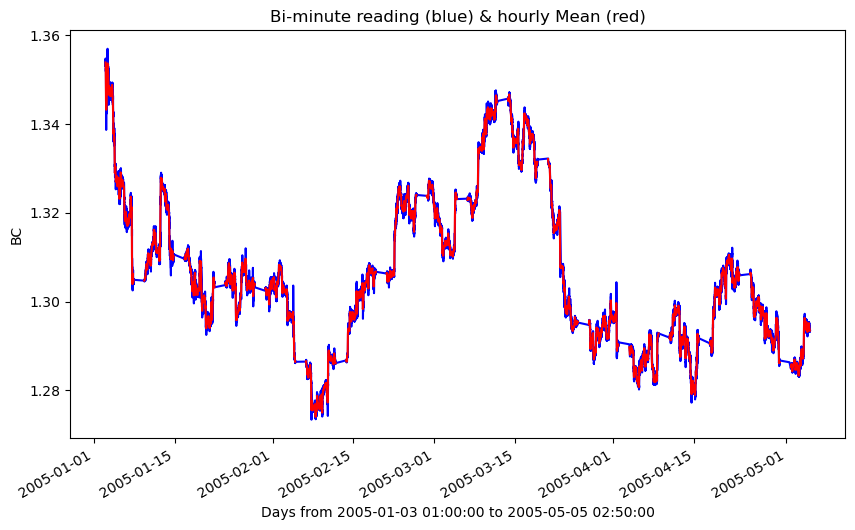

In [74]:
#Plot original time series and hourly mean
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)

selected_rows['BC'].plot(ax=ax, color='b')
hourly_mean.plot(ax=ax, color='r')

ax.set_title('Bi-minute reading (blue) & hourly Mean (red)')
ax.set_xlabel('Days from 2005-01-03 01:00:00 to 2005-05-05 02:50:00')
ax.set_ylabel('BC')

plt.savefig('plots/ch2/B07887_02_02.png', format='png', dpi=300)

## Let us shown an example of grouping by period

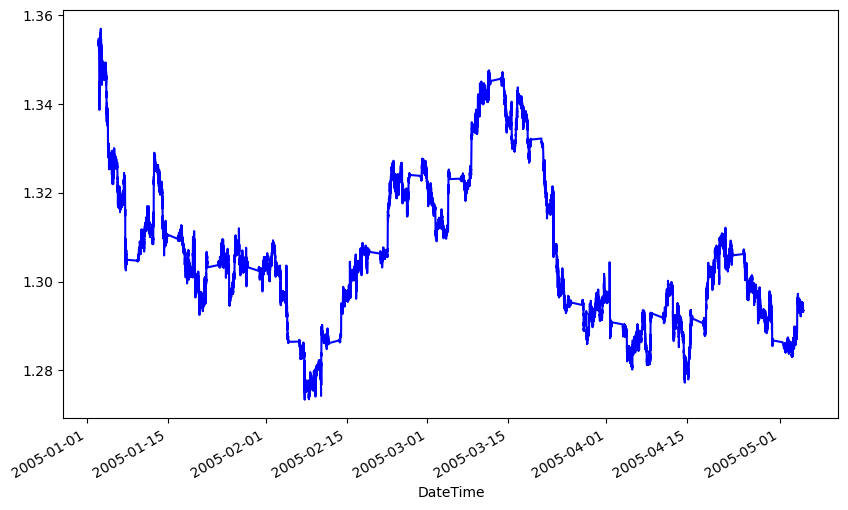

In [75]:
#Plot original time series on minute wise BC value
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)

selected_rows['BC'].plot(ax=ax, color='b')

ax.set_title('')

plt.savefig('plots/ch2/B07887_02_03.png', format='png', dpi=300)

In [76]:
#We need to groupby the data for every hour and find aggregate statistics

#Let's start by adding a hour_date column
selected_rows['Hour_Date'] = selected_rows.index.map(lambda d: d.strftime('%H-%D'))

selected_rows

,DateTime,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh,Hour_Date
DateTime,,,,,,,,,,,,,,
2005-01-03 01:00:00,2005-01-03 01:00:00,2005-01-03,1:0,1.35435,1.35455,1.3542,1.3543,0.00005,1.35495,1.35495,1.3545,1.3546,0.00035,01-01/03/05
2005-01-03 01:01:00,2005-01-03 01:01:00,2005-01-03,1:1,1.35420,1.35430,1.3541,1.3543,-0.00010,1.35450,1.35460,1.3544,1.3546,-0.00010,01-01/03/05
2005-01-03 01:02:00,2005-01-03 01:02:00,2005-01-03,1:2,1.35420,1.35420,1.3541,1.3541,0.00010,1.35450,1.35450,1.3544,1.3544,0.00010,01-01/03/05
2005-01-03 01:03:00,2005-01-03 01:03:00,2005-01-03,1:3,1.35420,1.35420,1.3541,1.3541,0.00010,1.35450,1.35450,1.3544,1.3544,0.00010,01-01/03/05
2005-01-03 01:04:00,2005-01-03 01:04:00,2005-01-03,1:4,1.35420,1.35420,1.3540,1.3541,0.00010,1.35450,1.35450,1.3543,1.3544,0.00010,01-01/03/05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-05 02:41:00,2005-05-05 02:41:00,2005-05-05,2:41,1.29340,1.29340,1.2934,1.2934,0.00000,1.29360,1.29360,1.2936,1.2936,0.00000,02-05/05/05
2005-05-05 02:43:00,2005-05-05 02:43:00,2005-05-05,2:43,1.29330,1.29330,1.2933,1.2933,0.00000,1.29350,1.29350,1.2935,1.2935,0.00000,02-05/05/05
2005-05-05 02:44:00,2005-05-05 02:44:00,2005-05-05,2:44,1.29330,1.29330,1.2933,1.2933,0.00000,1.29350,1.29350,1.2935,1.2935,0.00000,02-05/05/05


In [77]:
#Calculate hour wise statistics
hourly_stats = selected_rows.groupby(by='Hour_Date')['BC'].aggregate([np.mean, np.median,
                                                                           np.std
                                                                          ])
hourly_stats.reset_index(inplace=True)
hourly_stats

,Hour_Date,mean,median,std
0,00-01/04/05,1.346409,1.34650,0.000322
1,00-01/05/05,1.328300,1.32840,0.000348
2,00-01/06/05,1.326646,1.32663,0.000468
3,00-01/07/05,1.317424,1.31731,0.000421
4,00-01/10/05,1.306589,1.30670,0.000396
...,...,...,...,...
2179,23-04/28/05,1.290298,1.29035,0.000235
2180,23-05/01/05,1.285321,1.28530,0.000226
2181,23-05/02/05,1.285323,1.28540,0.000364
2182,23-05/03/05,1.287944,1.28793,0.000191


Hour_Date format : hh-mm/dd/yy

In [78]:
# Let's create hour and date columns and sort by them to reorder the rows
hourly_stats['Date'] = hourly_stats['Hour_Date'].map(lambda m: pd.to_datetime(m, format='%H-%m/%d/%y').strftime('%m/%d/%y'))
hourly_stats['Hour'] = hourly_stats['Hour_Date'].map(lambda m: pd.to_datetime(m, format='%H-%m/%d/%y').strftime('%H'))
hourly_stats.sort_values(by=['Date', 'Hour'], inplace=True)
hourly_stats

,Hour_Date,mean,median,std,Date,Hour
88,01-01/03/05,1.353907,1.35385,0.000483,01/03/05,01
177,02-01/03/05,1.352083,1.35215,0.000569,01/03/05,02
266,03-01/03/05,1.345333,1.34545,0.003328,01/03/05,03
354,04-01/03/05,1.343240,1.34325,0.000648,01/03/05,04
442,05-01/03/05,1.344267,1.34430,0.000323,01/03/05,05
...,...,...,...,...,...,...
2095,22-05/04/05,1.295129,1.29520,0.000196,05/04/05,22
2183,23-05/04/05,1.294776,1.29480,0.000319,05/04/05,23
87,00-05/05/05,1.294004,1.29410,0.000284,05/05/05,00
176,01-05/05/05,1.293844,1.29390,0.000339,05/05/05,01


In [79]:
#Let's set the hour_date as the row index
hourly_stats.index = hourly_stats['Hour_Date']

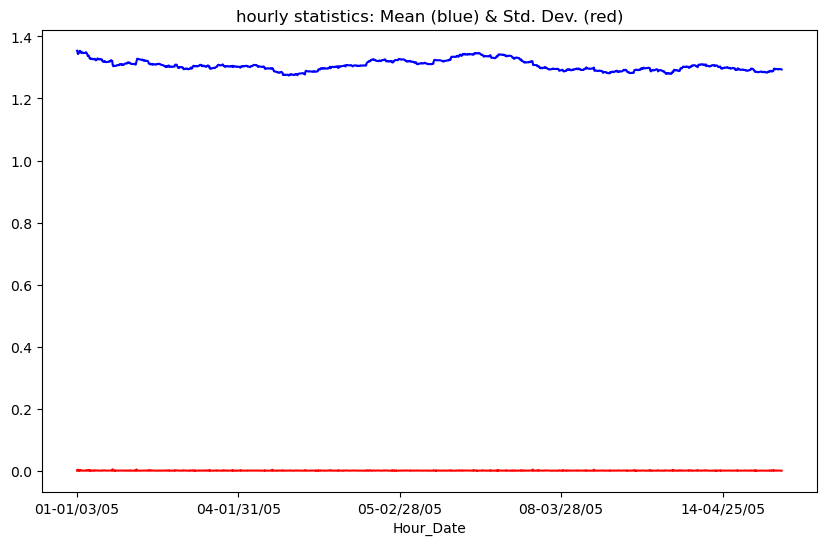

In [80]:
#Plot original time series and hourly mean
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)

hourly_stats['mean'].plot(ax=ax, color='b')
hourly_stats['std'].plot(ax=ax, color='r')

ax.set_title('hourly statistics: Mean (blue) & Std. Dev. (red)')

plt.savefig('plots/ch2/B07887_02_04.png', format='png', dpi=300)

In [81]:
#Now we will calculate hourly moving average on the original time series of minute wise BC
hourly_moving_average = selected_rows['BC'].rolling(60).mean()

In [82]:
#Now we will calculate daily moving average on the original time series of minute wise BC
daily_moving_average = selected_rows['BC'].rolling(1140).mean()

In [83]:
#Now we will calculate weekly moving average on the original time series of minute wise BC
weekly_moving_average = selected_rows['BC'].rolling(10080).mean()

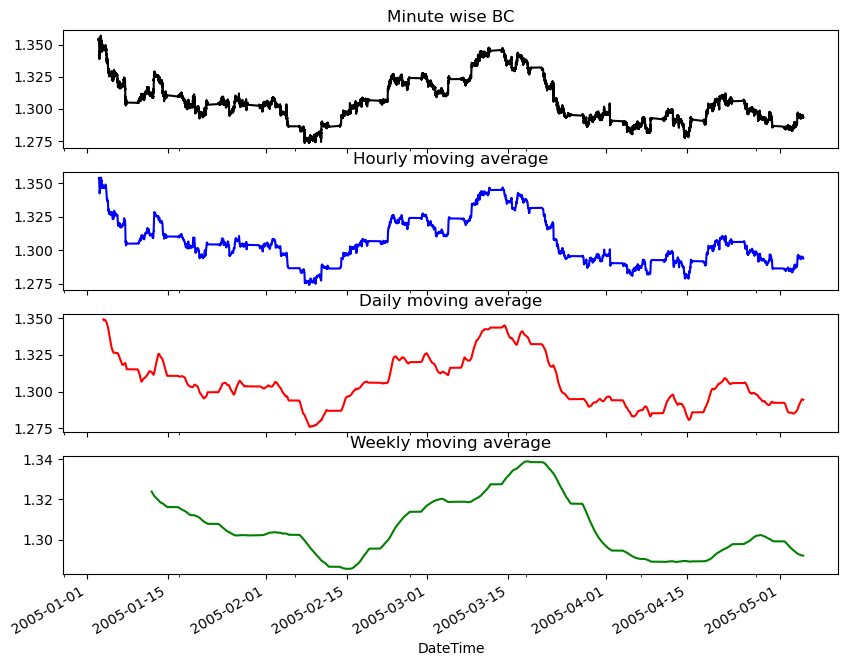

In [86]:
#Plot original time series and weekly moving average
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(10, 8)

selected_rows['BC'].plot(ax=axarr[0], color='k')
axarr[0].set_title('Minute wise BC')

hourly_moving_average.plot(ax=axarr[1], color='b')
axarr[1].set_title('Hourly moving average')

daily_moving_average.plot(ax=axarr[2], color='r')
axarr[2].set_title('Daily moving average')

weekly_moving_average.plot(ax=axarr[3], color='g')
axarr[3].set_title('Weekly moving average')

plt.savefig('plots/ch2/B07887_02_05.png', format='png', dpi=300)